## This notebook follows a tutorial from the Tenserflow in practice Coursera specialization. I added my own implementation and visualization for the CNN.

In [2]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [3]:

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-07-06 02:15:45--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.84.230.134, 2600:1407:d800:2a1::e59, 2600:1407:d800:29e::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|184.84.230.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   106MB/s    in 10s     

2020-07-06 02:15:55 (75.3 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [4]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [5]:
# Use os.mkdir to create your directories
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
except OSError:
    pass

In [7]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives a listing of the contents of that directory
# os.path.getsize(PATH) gives the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    valid_files = []
    for name in os.listdir(SOURCE):
        file_path = SOURCE + name
        if(os.path.getsize(file_path) > 0):
            valid_files.append(name)
        else:
            print(name + " has zero length.")
    
    training_length = int(len(valid_files) * SPLIT_SIZE)
    testing_length = int(len(valid_files) - training_length)
    shuffled_files = random.sample(valid_files, len(valid_files))
    training_files = shuffled_files[0:training_length]
    testing_files = shuffled_files[-testing_length:]
    
    for name in training_files:
        current_path = SOURCE + name
        destination_path = TRAINING + name
        copyfile(current_path, destination_path)

    for name in testing_files:
        current_path = SOURCE + name
        destination_path = TESTING + name
        copyfile(current_path, destination_path)

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg has zero length.
11702.jpg has zero length.


In [8]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [12]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=256,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1/255.,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
39/88 [============>.................] - ETA: 1:42 - loss: 0.6794 - accuracy: 0.6201

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

88/88 [==============================] - 208s 2s/step - loss: 0.6525 - accuracy: 0.6415 - val_loss: 1.2526 - val_accuracy: 0.5000
Epoch 2/15
88/88 [==============================] - 209s 2s/step - loss: 0.5826 - accuracy: 0.6963 - val_loss: 1.5182 - val_accuracy: 0.5008
Epoch 3/15
88/88 [==============================] - 216s 2s/step - loss: 0.5146 - accuracy: 0.7479 - val_loss: 1.5021 - val_accuracy: 0.5012
Epoch 4/15
88/88 [==============================] - 205s 2s/step - loss: 0.4681 - accuracy: 0.7782 - val_loss: 0.6984 - val_accuracy: 0.6048
Epoch 5/15
88/88 [==============================] - 204s 2s/step - loss: 0.4202 - accuracy: 0.8046 - val_loss: 0.7467 - val_accuracy: 0.6096
Epoch 6/15
88/88 [==============================] - 203s 2s/step - loss: 0.3871 - accuracy: 0.8269 - val_loss: 1.2300 - val_accuracy: 0.5996
Epoch 7/15
88/88 [==============================] - 203s 2s/step - loss: 0.3630 - accuracy: 0.8380 - val_loss: 0.3867 - val_accuracy: 0.8164
Epoch 8/15
88/88 [======

Training accuracy after 15 epochs: 0.8939
Testing accuracy after 15 epochs: 0.8608


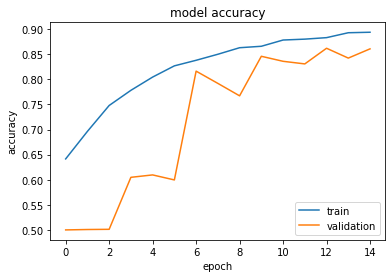

In [16]:
print('Training accuracy after 15 epochs: %.4f'%history.history['accuracy'][-1])
print('Testing accuracy after 15 epochs: %.4f'%history.history['val_accuracy'][-1])
# plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

Training loss after 15 epochs: 0.2528
Testing loss after 15 epochs: 0.3057


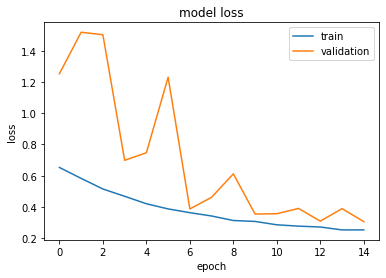

In [17]:
print('Training loss after 15 epochs: %.4f'%history.history['loss'][-1])
print('Testing loss after 15 epochs: %.4f'%history.history['val_loss'][-1])
# plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide


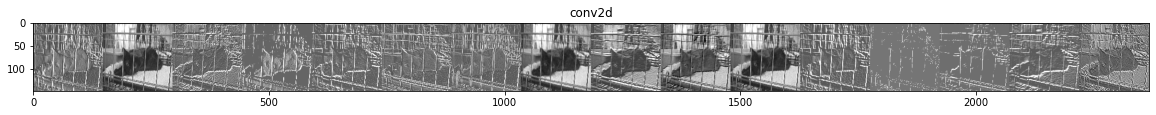

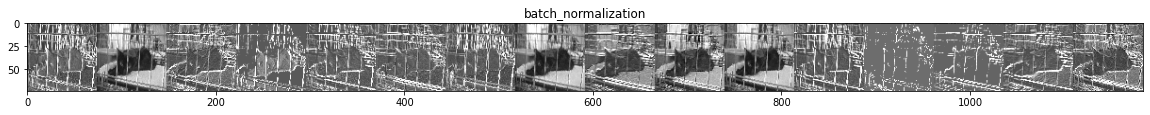

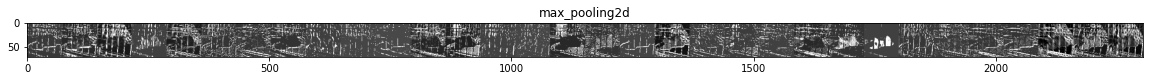

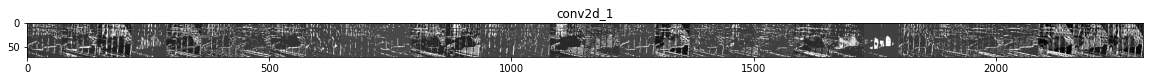

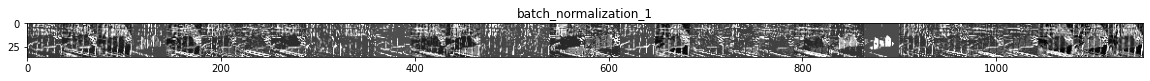

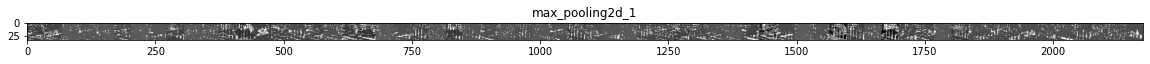

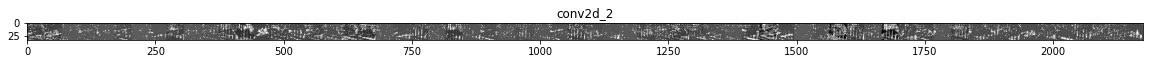

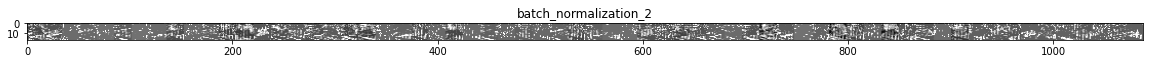

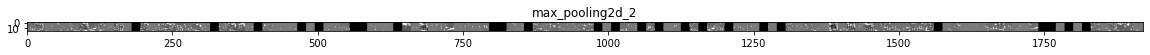

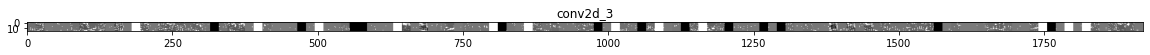

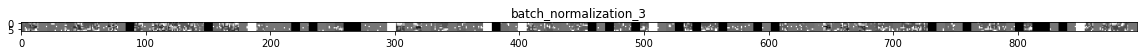

In [110]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(TRAINING_CATS_DIR, f) for f in os.listdir(TRAINING_CATS_DIR)]
dog_img_files = [os.path.join(TRAINING_DOGS_DIR, f) for f in os.listdir(TRAINING_DOGS_DIR)]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray' )

In [25]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(layer_name)

conv2d
batch_normalization
max_pooling2d
conv2d_1
batch_normalization_1
max_pooling2d_1
conv2d_2
batch_normalization_2
max_pooling2d_2
conv2d_3
batch_normalization_3
max_pooling2d_3
flatten
dense


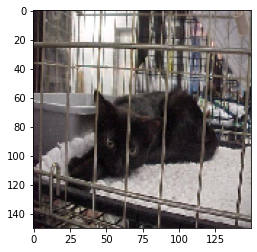

In [128]:
plt.imshow(img);

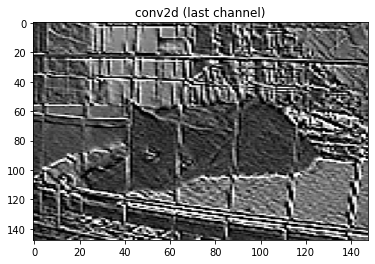

In [130]:
first_layer = model.get_layer(name='conv2d')
layer_name = first_layer.name
first_feature = successive_feature_maps[0]
#-------------------------------------------------
# Postprocess the feature to be visually palatable
#-------------------------------------------------
x  = first_feature[0, :, :, -1]
x -= x.mean()
x /= x.std ()
x *=  64
x += 128
x  = np.clip(x, 0, 255).astype('uint8')
plt.title ( layer_name+' (last channel)' )
plt.grid  ( False )
plt.imshow( x, aspect='auto', cmap='gray' );

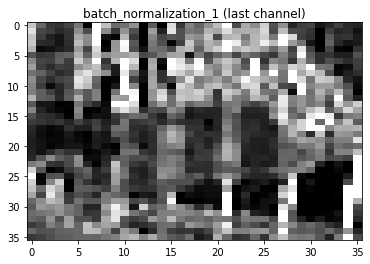

In [131]:
last_layer = model.get_layer(name='batch_normalization_1')
layer_name = last_layer.name
last_feature = successive_feature_maps[4]
x  = last_feature[0, :, :, -1]
x -= x.mean()
x /= x.std ()
x *=  64
x += 128
x  = np.clip(x, 0, 255).astype('uint8')

plt.title ( layer_name+' (last channel)'  )
plt.grid  ( False )
plt.imshow( x, aspect='auto', cmap='gray' );

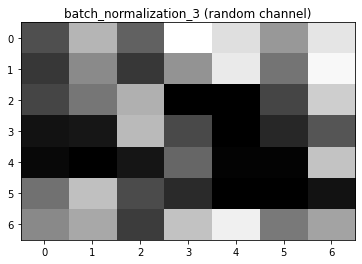

In [132]:
last_layer = model.get_layer(name='batch_normalization_3')
layer_name = last_layer.name
feature = successive_feature_maps[10]
x  = feature[0, :, :, 6]
x -= x.mean()
x /= x.std ()
x *=  64
x += 128
x  = np.clip(x, 0, 255).astype('uint8')

plt.title ( layer_name+' (random channel)'  )
plt.grid  ( False )
plt.imshow( x, aspect='auto', cmap='gray' );